# Census Income
### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Exploratory Data Analysis (EDA)

In [3]:
# checking shpae
print(df.shape)
print('Rows =',df.shape[0],'\nColumns =',df.shape[1])

(32560, 15)
Rows = 32560 
Columns = 15


In [4]:
# data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are two data types int64 and object.

In [5]:
# checking duplicate data
print('Duplicate rows =',df.duplicated().sum())
if df.duplicated().sum()!=0:
    print(df.duplicated().sum(),'duplicate rows present in the dataset.')
else:
    print('No duplicate rows present in the dataset.')    

Duplicate rows = 24
24 duplicate rows present in the dataset.


In [6]:
# checking duplicate rows
df[df.duplicated()]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [7]:
# removing duplicate rows
df = df.drop_duplicates()

In [8]:
# lets confirm duplicate rows have removed
df.duplicated().sum()

0

In [9]:
# reset the indices
df.reset_index(inplace=True,drop=True)

In [10]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Total null values in dataset -  0


In [11]:
# checking unique values count
for i in df.columns:
    print('\nTotal unique values in column',i,'-',df[i].nunique())
    print('\nunique values in column',i,'-')
    print(df[i].value_counts())
    print('_'*50)


Total unique values in column Age - 73

unique values in column Age -
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
__________________________________________________

Total unique values in column Workclass - 9

unique values in column Workclass -
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
__________________________________________________

Total unique values in column Fnlwgt - 21647

unique values in column Fnlwgt -
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
__________________________________________________

Total uni

1) Columns Workclass, Occupation and Native_country contain ?.                                                                 
2)  columns Education and Education_num have the same number of unique values. It looks like the column Education_num is code for the column Education.                                                        
3) In Capital_gain and Capital_loss columns, more than 90% values are 0.


In [12]:
df.loc[(df.Workclass==' ?') | (df.Native_country==' ?') | (df.Occupation==' ?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32505,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32506,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32514,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32516,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


2398 rows contain '?'. If we remove these rows we will lose 7.37% of data.

In [13]:
# replacing ? with NaN
df.replace(' ?',np.nan, inplace=True)

In [14]:
# Let's check null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

Total null values in dataset -  4261


In [15]:
# dropping irrelevant column
df.drop('Education_num',axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Marital_status  32536 non-null  object
 5   Occupation      30693 non-null  object
 6   Relationship    32536 non-null  object
 7   Race            32536 non-null  object
 8   Sex             32536 non-null  object
 9   Capital_gain    32536 non-null  int64 
 10  Capital_loss    32536 non-null  int64 
 11  Hours_per_week  32536 non-null  int64 
 12  Native_country  31954 non-null  object
 13  Income          32536 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


we have total 32536 entries(rows) and 14 columns. Null vaules present in columns Workclass, Occupation and Native_country. These columns data types are object. we will use mode method to replace null values.

In [17]:
# numerical columns and categorical columns
num_col = []
cat_col = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('Numerical columns-\n',num_col,'\n\nCategorical columns-\n',cat_col)

Numerical columns-
 ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week'] 

Categorical columns-
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [18]:
# statistical description
df.describe()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [19]:
df.describe(include='object')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,30700,32536,32536,30693,32536,32536,32536,31954,32536
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27794,21774,29152,24697


### Data visualization

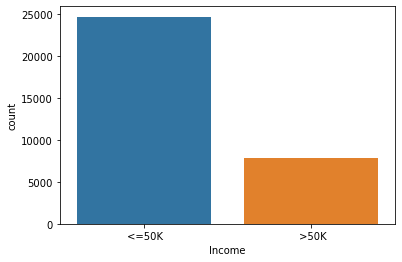

In [20]:
# countplot
sns.countplot(x='Income',data=df)
plt.show()

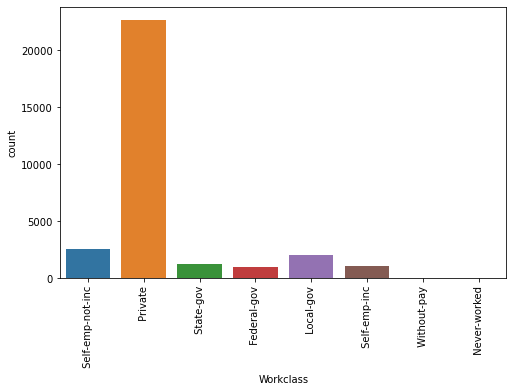

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Workclass',data=df)
plt.xticks(rotation=90)
plt.show()

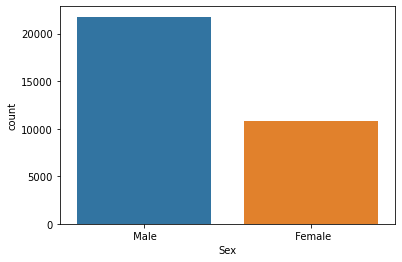

In [22]:
sns.countplot(x='Sex',data=df)
plt.show()

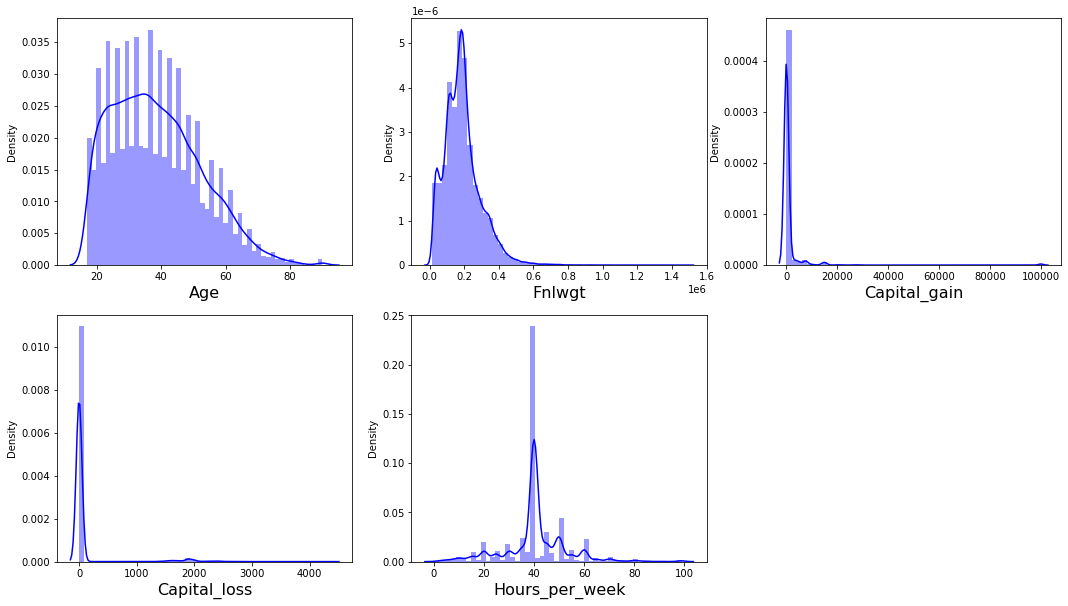

In [23]:
# distribution plot
plt.figure(figsize=(18,10))
pn=1

for i in num_col:
    if pn<10:
        ax = plt.subplot(2,3,pn)
        sns.distplot(df[i],color='b')
        plt.xlabel(i,fontsize=16)
    pn+=1
plt.show()

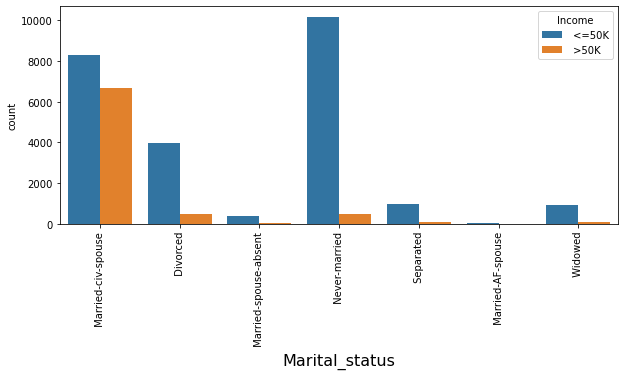

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=90)
plt.xlabel('Marital_status',fontsize=16)
plt.show()

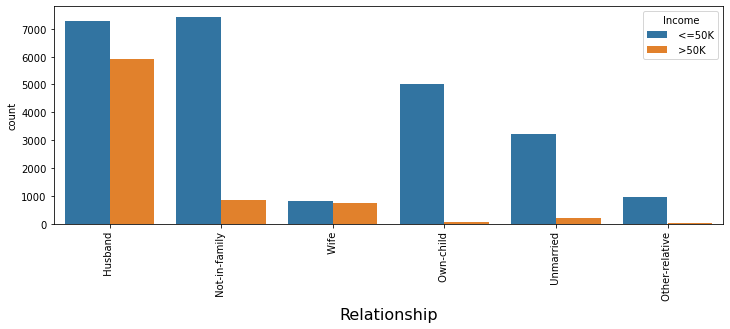

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=90)
plt.xlabel('Relationship',fontsize=16)
plt.show()

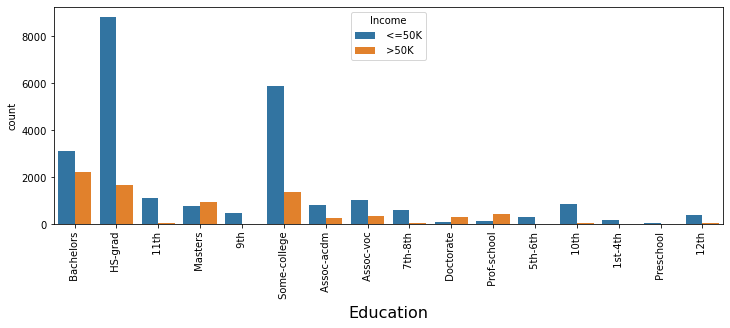

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='Education',hue='Income',data=df)
plt.xticks(rotation=90)
plt.xlabel('Education',fontsize=16)
plt.show()

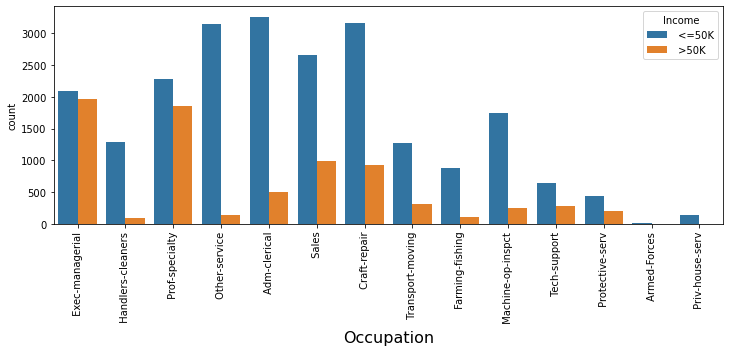

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)
plt.xlabel('Occupation',fontsize=16)
plt.show()

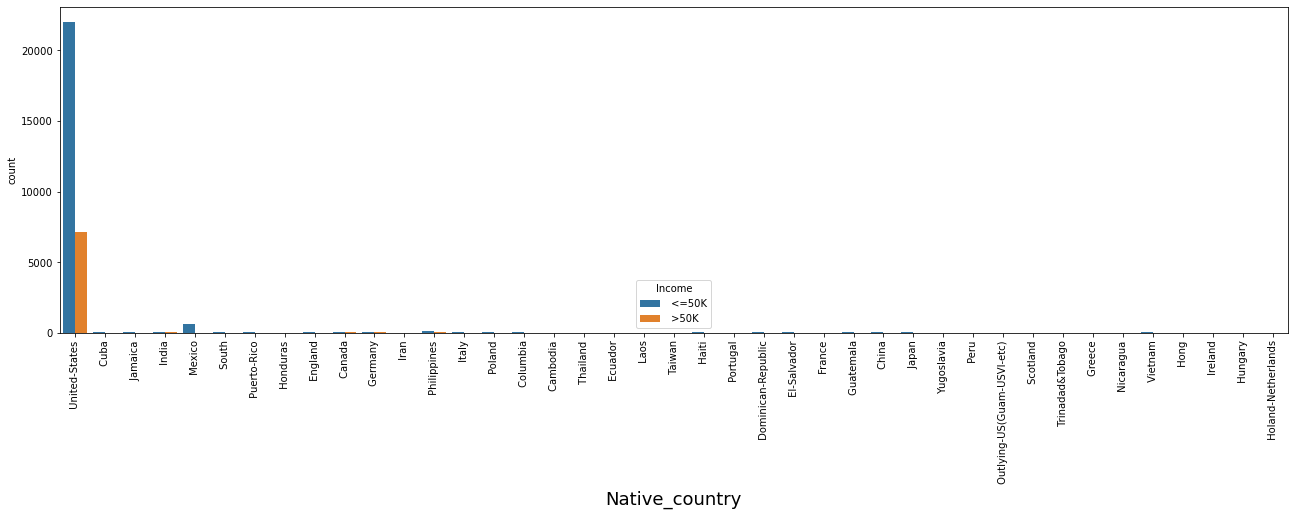

In [28]:
plt.figure(figsize=(22,6))
sns.countplot(x='Native_country',hue='Income',data=df)
plt.xticks(rotation=90)
plt.xlabel('Native_country',fontsize=18)
plt.show()

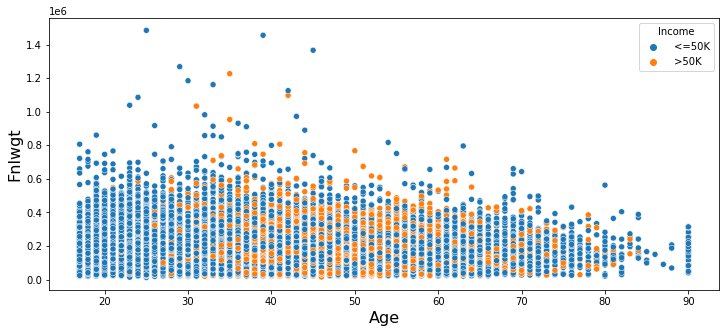

In [29]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Fnlwgt',hue='Income',data=df)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Fnlwgt',fontsize=16)
plt.show()

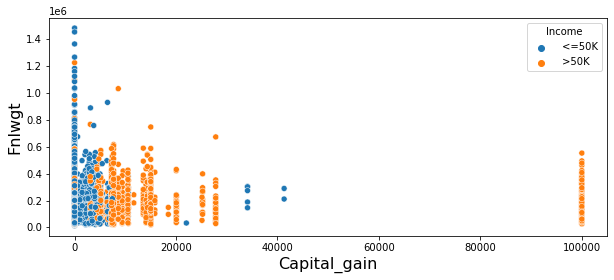

In [30]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Capital_gain',y='Fnlwgt',hue='Income',data=df)
plt.xlabel('Capital_gain',fontsize=16)
plt.ylabel('Fnlwgt',fontsize=16)
plt.show()

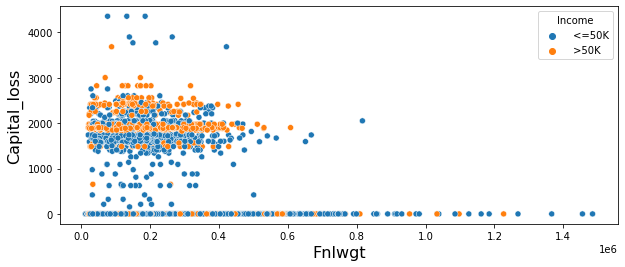

In [31]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Fnlwgt',y='Capital_loss',hue='Income',data=df)
plt.xlabel('Fnlwgt',fontsize=16)
plt.ylabel('Capital_loss',fontsize=16)
plt.show()

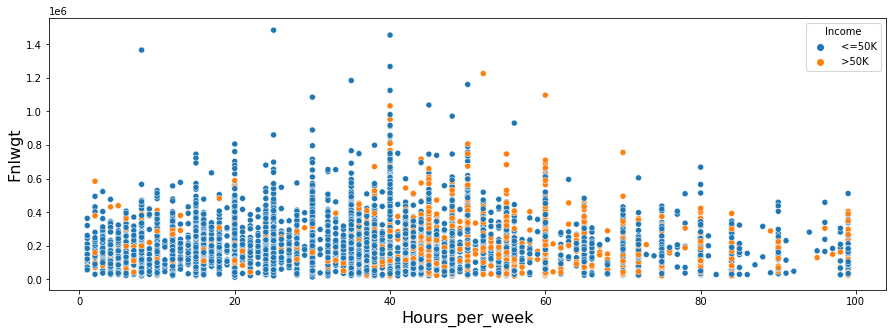

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Hours_per_week',y='Fnlwgt',hue='Income',data=df)
plt.xlabel('Hours_per_week',fontsize=16)
plt.ylabel('Fnlwgt',fontsize=16)
plt.show()

In [33]:
df.corr()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076448,0.077676,0.057745,0.068515
Fnlwgt,-0.076448,1.000000,0.000433,-0.010267,-0.018900
Capital_gain,0.077676,0.000433,1.000000,-0.031638,0.078408
Capital_loss,0.057745,-0.010267,-0.031638,1.000000,0.054229
Hours_per_week,0.068515,-0.018900,0.078408,0.054229,1.000000


In [34]:
# separating features and target variable.
x = df.drop('Income',axis=1)                        # features
y = df['Income']                                    # target variable

In [35]:
# checking skewness
x.skew()

Age                0.557657
Fnlwgt             1.447695
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

In [36]:
skew =['Age','Fnlwgt','Capital_gain','Capital_loss']

In [37]:
# reducing skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
x[skew] = pt.fit_transform(x[skew])
x.skew()

Age              -0.013967
Fnlwgt            0.016961
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
dtype: float64

skewness is reduced

In [38]:
# replacing null values using mode method
for i in ['Workclass','Occupation','Native_country']:
    x[i] = x[i].replace(np.nan,x[i].mode()[0])

In [39]:
x.isnull().sum().sum()

0

In [40]:
other_countries = x['Native_country'].unique()[1:]

In [41]:
other_countries

array([' Cuba', ' Jamaica', ' India', ' Mexico', ' South', ' Puerto-Rico',
       ' Honduras', ' England', ' Canada', ' Germany', ' Iran',
       ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' China', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [42]:
# replacing values
for i in x['Native_country']:
    if i in other_countries:
        x['Native_country'].replace(i,'other_country',inplace=True)

In [43]:
x['Native_country'].value_counts()

 United-States    29734
other_country      2802
Name: Native_country, dtype: int64

In [44]:
# removing Income from cat_col
cat_col=cat_col[:8]

In [45]:
# encoding categorical data
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
x[cat_col]=OE.fit_transform(x[cat_col])
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,5.421001,5.0,273.889940,9.0,2.0,3.0,0.0,4.0,1.0,-0.000000,-0.0,13,0.0
1,4.936802,3.0,409.325561,11.0,0.0,5.0,1.0,4.0,1.0,-0.000000,-0.0,40,0.0
2,5.526805,3.0,424.226307,1.0,2.0,5.0,0.0,2.0,1.0,-0.000000,-0.0,40,0.0
3,4.425012,3.0,494.984991,9.0,2.0,9.0,5.0,2.0,0.0,-0.000000,-0.0,40,1.0
4,4.890981,3.0,460.126008,12.0,2.0,3.0,5.0,4.0,0.0,-0.000000,-0.0,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,4.365939,3.0,440.983596,7.0,2.0,12.0,5.0,4.0,0.0,-0.000000,-0.0,38,0.0
32532,5.025542,3.0,355.464979,11.0,2.0,6.0,0.0,4.0,1.0,-0.000000,-0.0,40,0.0
32533,5.692590,3.0,353.057979,11.0,6.0,0.0,4.0,4.0,0.0,-0.000000,-0.0,40,0.0
32534,4.040701,3.0,397.765321,11.0,4.0,0.0,3.0,4.0,1.0,-0.000000,-0.0,20,0.0


In [46]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
SD = StandardScaler()
x[num_col] = SD.fit_transform(x[num_col])
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891733,5.0,-1.089960,9.0,2.0,3.0,0.0,4.0,1.0,-0.301491,-0.221299,-2.222450,0.0
1,0.102259,3.0,0.398771,11.0,0.0,5.0,1.0,4.0,1.0,-0.301491,-0.221299,-0.035664,0.0
2,1.064242,3.0,0.562562,1.0,2.0,5.0,0.0,2.0,1.0,-0.301491,-0.221299,-0.035664,0.0
3,-0.732199,3.0,1.340353,9.0,2.0,9.0,5.0,2.0,0.0,-0.301491,-0.221299,-0.035664,1.0
4,0.027550,3.0,0.957178,12.0,2.0,3.0,5.0,4.0,0.0,-0.301491,-0.221299,-0.035664,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,-0.828514,3.0,0.746761,7.0,2.0,12.0,5.0,4.0,0.0,-0.301491,-0.221299,-0.197648,0.0
32532,0.246949,3.0,-0.193274,11.0,2.0,6.0,0.0,4.0,1.0,-0.301491,-0.221299,-0.035664,0.0
32533,1.334550,3.0,-0.219732,11.0,6.0,0.0,4.0,4.0,0.0,-0.301491,-0.221299,-0.035664,0.0
32534,-1.358807,3.0,0.271699,11.0,4.0,0.0,3.0,4.0,1.0,-0.301491,-0.221299,-1.655506,0.0


In [47]:
y.value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [48]:
# replacing values
y = y.replace([' <=50K',' >50K'],[0,1])
print(y.value_counts())
print('\nPercentage of 0 in dataset-',(y.value_counts()[0]/y.shape[0])*100,
      '%\nPercentage of 1 in dataset -',(y.value_counts()[1]/y.shape[0])*100,'%')

0    24697
1     7839
Name: Income, dtype: int64

Percentage of 0 in dataset- 75.90668797639538 %
Percentage of 1 in dataset - 24.093312023604625 %


In [49]:
# balancing data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)
print(x.shape)
print(y.shape)

(49394, 13)
(49394,)


### Models

In [50]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [51]:
# creating lists of models
LR = LogisticRegression()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

In [52]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=93)

In [53]:
# LogisticRegression model 
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(LR,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7352048046426884 

confusion matrix:-
 [[5338 2146]
 [1778 5557]] 

classification report:-
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      7484
           1       0.72      0.76      0.74      7335

    accuracy                           0.74     14819
   macro avg       0.74      0.74      0.74     14819
weighted avg       0.74      0.74      0.74     14819

checking Cross validation score:-

cross validation scores:- [0.72732794 0.73340081 0.72975709 0.73562753 0.72909496 0.73658635
 0.72848755 0.73233448 0.74225552 0.73577647] 
cross validation mean score = 0.7330648691362558 
Difference between accuracy score and cross validation mean score = 0.21399355064326553


In [54]:
# RandomForestClassifier model
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(RFC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8919630204467238 

confusion matrix:-
 [[6588  896]
 [ 705 6630]] 

classification report:-
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      7484
           1       0.88      0.90      0.89      7335

    accuracy                           0.89     14819
   macro avg       0.89      0.89      0.89     14819
weighted avg       0.89      0.89      0.89     14819

checking Cross validation score:-

cross validation scores:- [0.82894737 0.8340081  0.8388664  0.91234818 0.92427617 0.92873051
 0.9321725  0.92731322 0.93116015 0.92751569] 
cross validation mean score = 0.898533829316856 
Difference between accuracy score and cross validation mean score = -0.6570808870132172


In [55]:
# GradientBoostingClassifier model
GBC.fit(x_train,y_train)
y_pred=GBC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(GBC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8644307982994804 

confusion matrix:-
 [[6255 1229]
 [ 780 6555]] 

classification report:-
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      7484
           1       0.84      0.89      0.87      7335

    accuracy                           0.86     14819
   macro avg       0.87      0.86      0.86     14819
weighted avg       0.87      0.86      0.86     14819

checking Cross validation score:-

cross validation scores:- [0.81558704 0.81882591 0.82287449 0.87530364 0.87851792 0.88823649
 0.88297226 0.89026119 0.88438955 0.87770804] 
cross validation mean score = 0.8634676535514656 
Difference between accuracy score and cross validation mean score = 0.09631447480148436


In [56]:
# KNeighborsClassifier model
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(KNN,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8497199541129631 

confusion matrix:-
 [[5825 1659]
 [ 568 6767]] 

classification report:-
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      7484
           1       0.80      0.92      0.86      7335

    accuracy                           0.85     14819
   macro avg       0.86      0.85      0.85     14819
weighted avg       0.86      0.85      0.85     14819

checking Cross validation score:-

cross validation scores:- [0.83846154 0.84048583 0.83603239 0.85121457 0.86879935 0.86535736
 0.86292772 0.86110549 0.87062158 0.86394007] 
cross validation mean score = 0.8558945901127357 
Difference between accuracy score and cross validation mean score = -0.6174635999772637


In [57]:
# AdaBoostClassifier model
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ABC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8524191915783791 

confusion matrix:-
 [[6222 1262]
 [ 925 6410]] 

classification report:-
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      7484
           1       0.84      0.87      0.85      7335

    accuracy                           0.85     14819
   macro avg       0.85      0.85      0.85     14819
weighted avg       0.85      0.85      0.85     14819

checking Cross validation score:-

cross validation scores:- [0.81174089 0.81700405 0.82206478 0.8659919  0.86555983 0.87143146
 0.86677465 0.8718364  0.87062158 0.86252278] 
cross validation mean score = 0.8525548329293494 
Difference between accuracy score and cross validation mean score = -0.013564135097032803


In [58]:
# ExtraTreesclassifier model
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ETC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8997233281597948 

confusion matrix:-
 [[6603  881]
 [ 605 6730]] 

classification report:-
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      7484
           1       0.88      0.92      0.90      7335

    accuracy                           0.90     14819
   macro avg       0.90      0.90      0.90     14819
weighted avg       0.90      0.90      0.90     14819

checking Cross validation score:-

cross validation scores:- [0.85384615 0.8597166  0.86538462 0.91518219 0.92893298 0.92954039
 0.93298239 0.92468111 0.92792063 0.92913545] 
cross validation mean score = 0.906732250869515 
Difference between accuracy score and cross validation mean score = -0.70089227097202


In [59]:
# DecisionTreeClassifier model
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(DTC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8471556785208179 

confusion matrix:-
 [[6339 1145]
 [1120 6215]] 

classification report:-
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      7484
           1       0.84      0.85      0.85      7335

    accuracy                           0.85     14819
   macro avg       0.85      0.85      0.85     14819
weighted avg       0.85      0.85      0.85     14819

checking Cross validation score:-

cross validation scores:- [0.77165992 0.77307692 0.77408907 0.86983806 0.88054262 0.88580684
 0.88297226 0.89107107 0.8888439  0.88175744] 
cross validation mean score = 0.8499658095977403 
Difference between accuracy score and cross validation mean score = -0.28101310769224064


In [60]:
# Support vector Machines model
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(svc,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)*100
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7991092516364127 

confusion matrix:-
 [[5341 2143]
 [ 834 6501]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.71      0.78      7484
           1       0.75      0.89      0.81      7335

    accuracy                           0.80     14819
   macro avg       0.81      0.80      0.80     14819
weighted avg       0.81      0.80      0.80     14819

checking Cross validation score:-

cross validation scores:- [0.80101215 0.78947368 0.79291498 0.79574899 0.79631504 0.80805831
 0.80198421 0.80583114 0.80461632 0.79854222] 
cross validation mean score = 0.7994497033853498 
Difference between accuracy score and cross validation mean score = -0.03404517489371539


Here GradientBoostingClassifier is the best model. It has least difference between accuracy score and cross validation mean score.

#### Hyperparameter tuning

In [61]:
# parameter for GradientBoostingClassifier
param = {'n_estimators':[100,110,120],
         'max_depth':[2,3,4,],
         'random_state':[79,163,193]
        }

GSCV= GridSearchCV(estimator=GBC,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [100, 110, 120],
                         'random_state': [79, 163, 193]})

In [62]:
# finding best parameter value
GSCV.best_params_

{'max_depth': 4, 'n_estimators': 120, 'random_state': 193}

In [63]:
Model = GradientBoostingClassifier(n_estimators=120,max_depth=4,random_state=193)

In [64]:
# final model
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

Accuracy score = 0.8795465281058101 

confusion matrix:-
 [[6426 1058]
 [ 727 6608]] 

classification report:-
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      7484
           1       0.86      0.90      0.88      7335

    accuracy                           0.88     14819
   macro avg       0.88      0.88      0.88     14819
weighted avg       0.88      0.88      0.88     14819



In [65]:
# saving model
import pickle
pickle.dump(Model,open('income_Prediction.pkl','wb'))